# Part 1: Handling Image Data

In this notebook, we will learn how to manipulate image data as arrays.

In [1]:
import os
import imageio
import matplotlib.pyplot as plt
import copy

plt.rcParams['figure.dpi'] = 200

## 1. Loading and visualization

Throughout this practical, we will be using two image sets from the Broad Bioimage Benchmark Collection (BBBC, https://bbbc.broadinstitute.org/):
- BBBC010 (https://bbbc.broadinstitute.org/BBBC010/), a dataset of brightfield microscopy images of a C. elegans live/dead assay;
- BBBC020 (https://bbbc.broadinstitute.org/BBBC020/), a dataset of fluorescence microscopy images of the cell membrane and nucleus of murine bone-marrow derived macrophages.

**1.1** Load sample images from each datasets by running the lines below. 

*There exists plenty of different libraries to load image data, but here we will rely on imageio (https://pypi.org/project/imageio/) as it can handle a wide range of formats that are relevant to microscopy.*

In [2]:
# BBBC010
# Live worms example
bbbc010_live = imageio.imread('data/BBBC010/live.tif')
# Dead worms example
bbbc010_dead = imageio.imread('data/BBBC010/dead.tif')

In [3]:
# BBBC020
# Cell membranes example
bbbc020_cell = imageio.imread('data/BBBC020/membranes.tif')
# Nuclei example
bbbc020_nuclei = imageio.imread('data/BBBC020/nuclei.tif')

**1.2** Visualize the images with matplotlib (https://matplotlib.org/) by running the lines below.

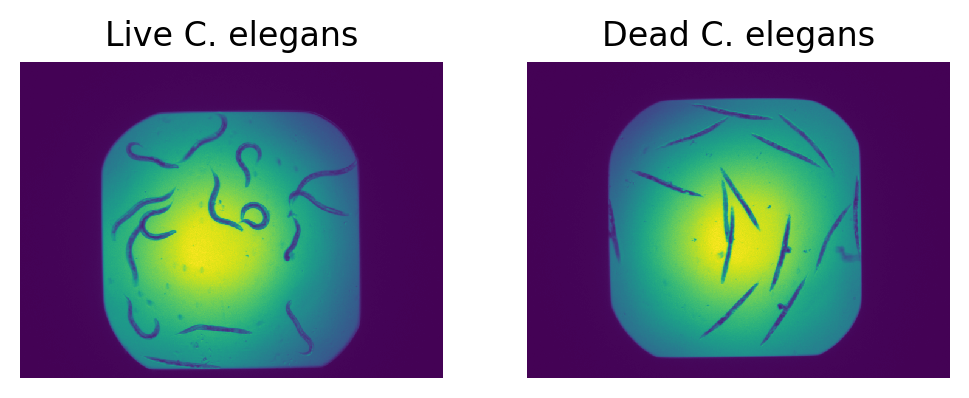

In [4]:
# BBBC010
fig, axes = plt.subplots(nrows=1, ncols=2)

axes[0].imshow(bbbc010_live)
axes[0].axis('off')
axes[0].set_title('Live C. elegans')

axes[1].imshow(bbbc010_dead)
axes[1].axis('off')
axes[1].set_title('Dead C. elegans')

plt.show()

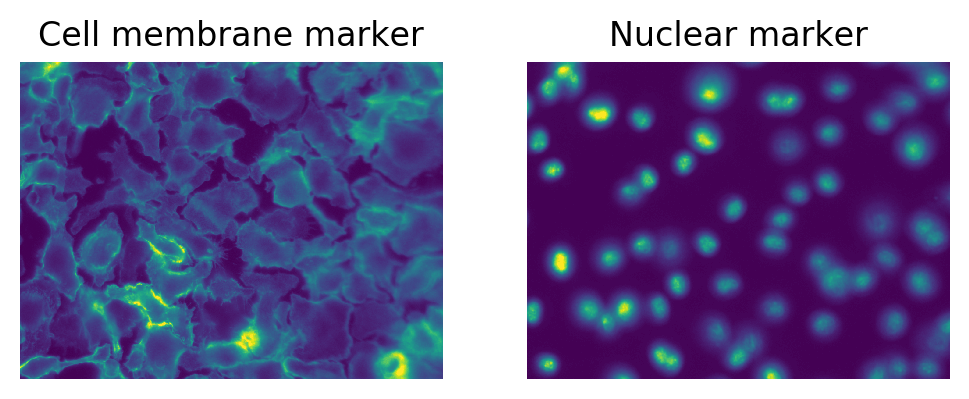

In [5]:
# BBBC020
fig, axes = plt.subplots(nrows=1, ncols=2)

axes[0].imshow(bbbc020_cell)
axes[0].axis('off')
axes[0].set_title('Cell membrane marker')

axes[1].imshow(bbbc020_nuclei)
axes[1].axis('off')
axes[1].set_title('Nuclear marker')

plt.show()

**1.3** As the image data we are working with are grayscale, what we see in 1.2 is pseudo-color. We can change that for any other colormap that matplotlib offers (see https://matplotlib.org/stable/tutorials/colors/colormaps.html). By adapting the code below, visualize the BBBC020 images in grayscale and with you favourite colormap.

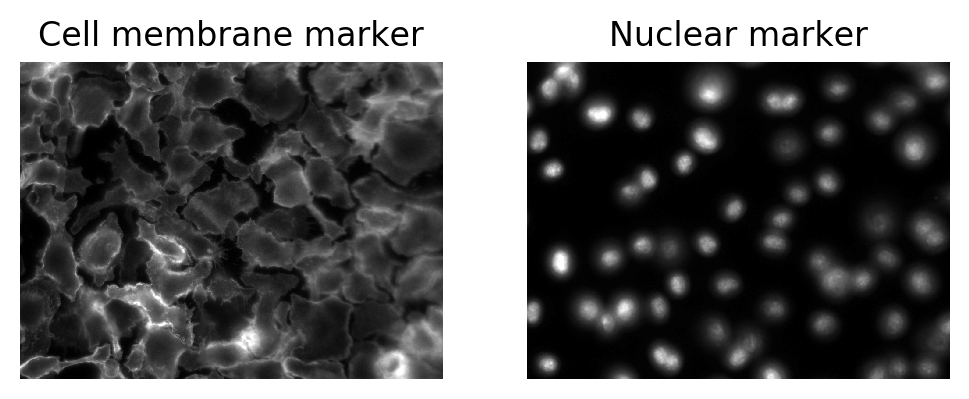

In [6]:
# Grayscale
fig, axes = plt.subplots(nrows=1, ncols=2)

axes[0].imshow(bbbc020_cell, cmap='gray')
axes[0].axis('off')
axes[0].set_title('Cell membrane marker')

axes[1].imshow(bbbc020_nuclei, cmap='gray')
axes[1].axis('off')
axes[1].set_title('Nuclear marker')

plt.show()

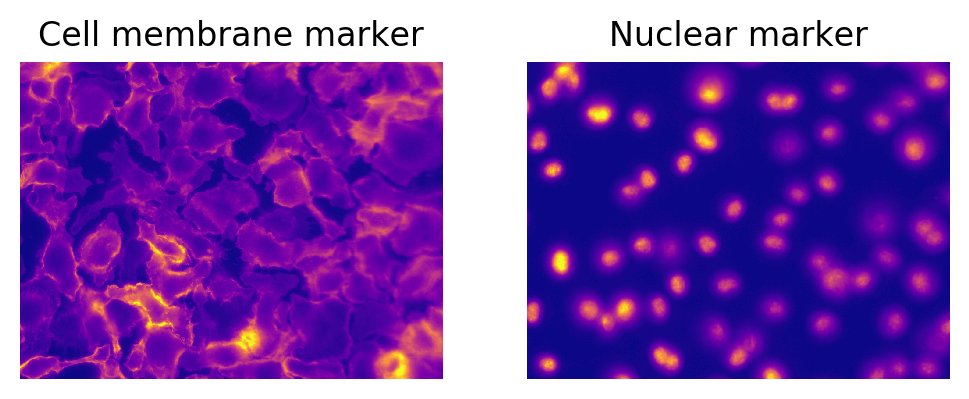

In [7]:
# Your favourite colormap
fig, axes = plt.subplots(nrows=1, ncols=2)

axes[0].imshow(bbbc020_cell, cmap='plasma')
axes[0].axis('off')
axes[0].set_title('Cell membrane marker')

axes[1].imshow(bbbc020_nuclei, cmap='plasma')
axes[1].axis('off')
axes[1].set_title('Nuclear marker')

plt.show()

**1.4** Since images are stored as arrays, we can vizualize regions of interest by specifying a range of image coordinates to be displayed. Run the code lines below to visualize a crop of one of the BBBC010 images. Can you modify it to display a different part of the image? 

*Bonus challenge*: can you adapt the code so that the origin of the crop and its size are expressed relatively to the image dimensions?

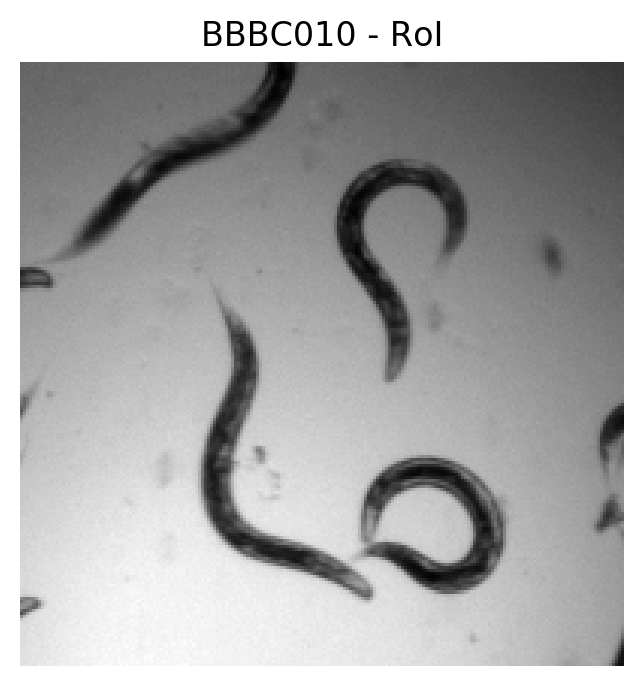

In [8]:
# Initial crop
origin = (100,250)
size = (200,200)

plt.imshow(bbbc010_live[origin[0]:origin[0]+size[0],origin[1]:origin[1]+size[1]], cmap='gray')
plt.axis('off')
plt.title('BBBC010 - RoI')

plt.show()

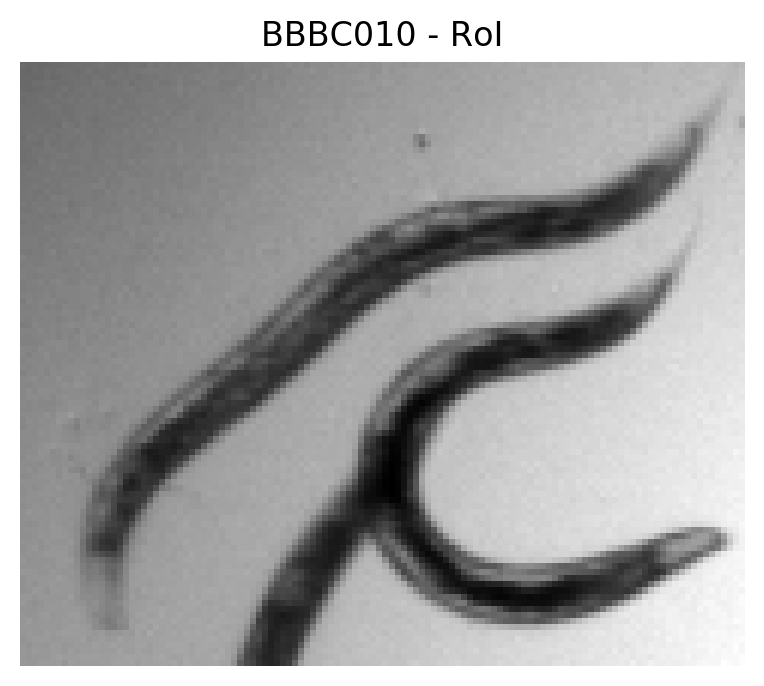

In [9]:
# Crop around different area
origin = (200,140)
size = (100,120)

plt.imshow(bbbc010_live[origin[0]:origin[0]+size[0],origin[1]:origin[1]+size[1]], cmap='gray')
plt.axis('off')
plt.title('BBBC010 - RoI')

plt.show()

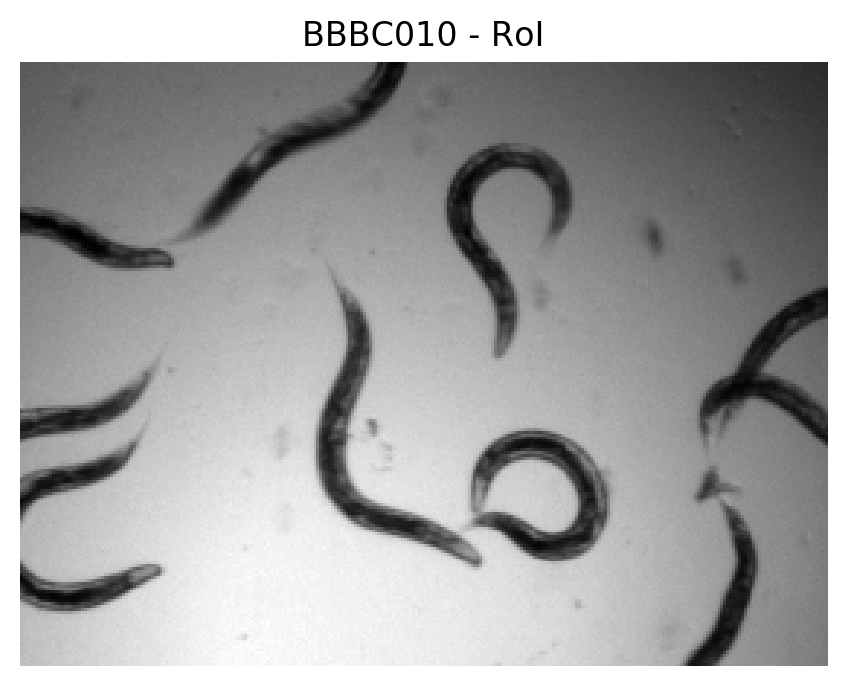

In [10]:
# Bonus challenge: crop in relative coordinates
(width, height) = bbbc010_live.shape

origin = (int(0.2*width),int(0.3*height))
size = (int(0.4*width),int(0.4*height))

plt.imshow(bbbc010_live[origin[0]:origin[0]+size[0],origin[1]:origin[1]+size[1]], cmap='gray')
plt.axis('off')
plt.title('BBBC010 - RoI')

plt.show()

**1.4** Although we used it only to visualize images up to now, matplotlib is a general plotting library that can do much more. One relevant feature in the context of this tutorial is the ability to combine classical plots with images. Run the code below to see one such example in which a red rectangle is overlaid to surround a region of interest.

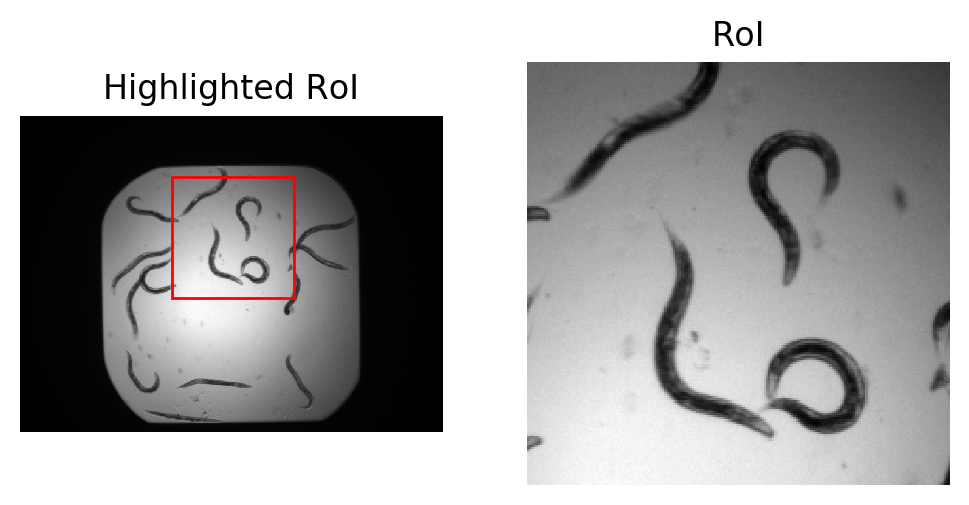

In [11]:
import matplotlib.patches as patches

# Crop from 1.3
origin = (100,250)
size = (200,200)

# Note that the x and y axes are swapped for images and plots
rect = patches.Rectangle(origin[::-1], size[0], size[1], linewidth=1, edgecolor='r', facecolor='none')

fig, axes = plt.subplots(nrows=1, ncols=2)

axes[0].imshow(bbbc010_live, cmap='gray')
axes[0].axis('off')
axes[0].add_patch(rect)
axes[0].set_title('Highlighted RoI')

axes[1].imshow(bbbc010_live[origin[0]:origin[0]+size[0],origin[1]:origin[1]+size[1]], cmap='gray')
axes[1].axis('off')
axes[1].set_title('RoI')

plt.show()

## 2. Image modifications

Now that we know how to load and visualize image data, let's have a look at basic operations we can do to modify them.

**2.1** In the same way that we were able to visualize a crop of the image, we can modify selected portion of the data. By adapting the code from 1.4, "erase" a patch of a copy of one of the images we are working with by setting to zero all pixels in a range of coordinates. This operation is usually referred to as *masking*. To check the result, visualize the modified image. 

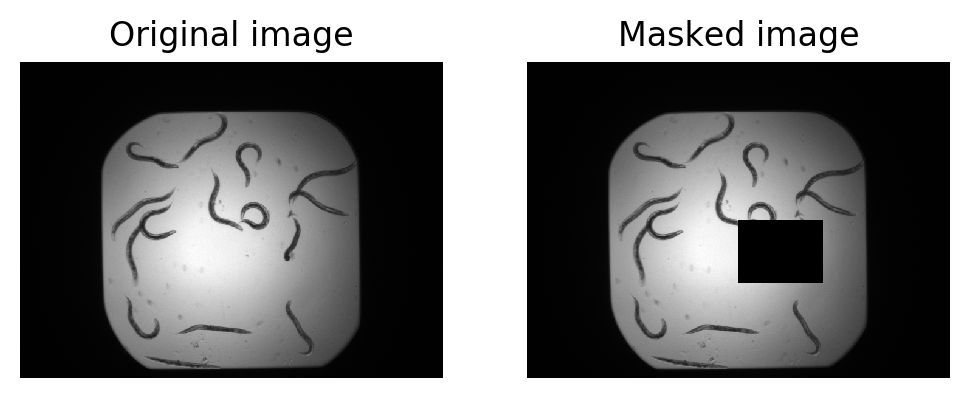

In [12]:
# Do not forget to work on a copy of the image!
original_img = bbbc010_live
masked_img = copy.deepcopy(original_img)

# Region to be masked
(width, height) = masked_img.shape
origin = (int(0.5*width),int(0.5*height))
size = (int(0.2*width),int(0.2*height))

# Masking
masked_img[origin[0]:origin[0]+size[0],origin[1]:origin[1]+size[1]] = 0

# Visualize result
fig, axes = plt.subplots(nrows=1, ncols=2)

axes[0].imshow(original_img, cmap='gray')
axes[0].axis('off')
axes[0].set_title('Original image')

axes[1].imshow(masked_img, cmap='gray')
axes[1].axis('off')
axes[1].set_title('Masked image')

plt.show()

**2.2** Further to setting pixels to whichever constant value we chose (as we did when masking in 2.1), we can also apply modifications that depend on the original image values. A simple example is *image inversion*, also called *image negative*. The grayscale images we are working with are all in the [0,255] range. To compute the inverted (or negative) version of the image of your choice, you will therefore need to swap values so that what used to be 0 is mapped to 255, what used to 255 is mapped to 0, and so on for all values in between.

*Bonus*: if you only want the negative of the image for esthetic purposes (i.e., it looks better, but this is not needed for further processing), there is no need to modify the data directly. Instead, it is best to play on the visualization directly with colormaps. By adapting what you did in 1.3, display the inverse of the original image without modifying its data.

*Bonus challenge*: the [0,255] range is the realm of 8-bit images, but there are many more formats out there. If you are up for the challenge, adapt your code to invert an image from each dataset in its raw format (16-bit and RGB). 

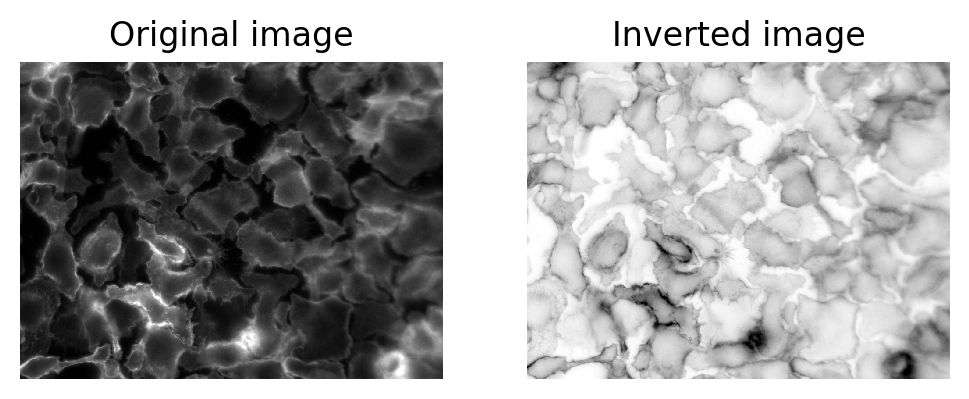

In [13]:
original_img = bbbc020_cell
inverted_img = copy.deepcopy(original_img)

# Inversion
(width, height) = inverted_img.shape

#################################### TODO: also add a more pythonic but less readable versiopn in the solution?
for x in range(width):
    for y in range(height):
        inverted_img[x,y] = abs(inverted_img[x,y]-255)
        
# Visualize result
fig, axes = plt.subplots(nrows=1, ncols=2)

axes[0].imshow(original_img, cmap='gray')
axes[0].axis('off')
axes[0].set_title('Original image')

axes[1].imshow(inverted_img, cmap='gray')
axes[1].axis('off')
axes[1].set_title('Inverted image')

plt.show()

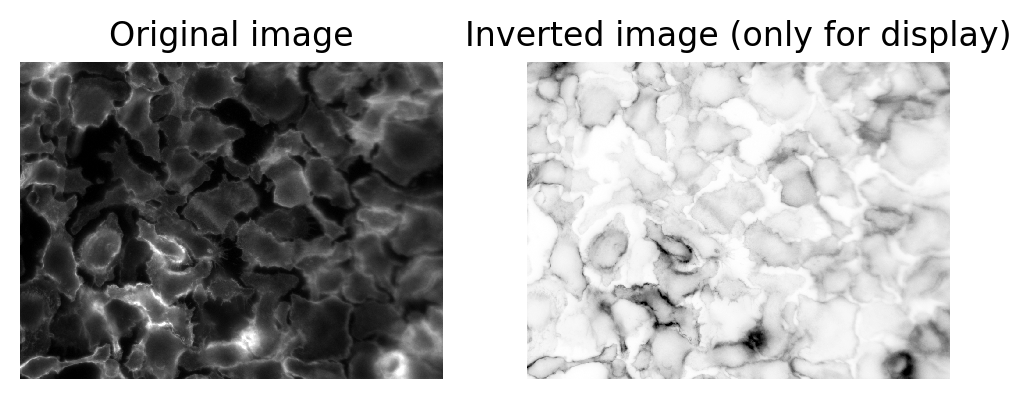

In [14]:
# Bonus: play on colormap (no image modification)
fig, axes = plt.subplots(nrows=1, ncols=2)

axes[0].imshow(original_img, cmap='gray')
axes[0].axis('off')
axes[0].set_title('Original image')

axes[1].imshow(original_img, cmap='Greys')
axes[1].axis('off')
axes[1].set_title('Inverted image (only for display)')

plt.show()

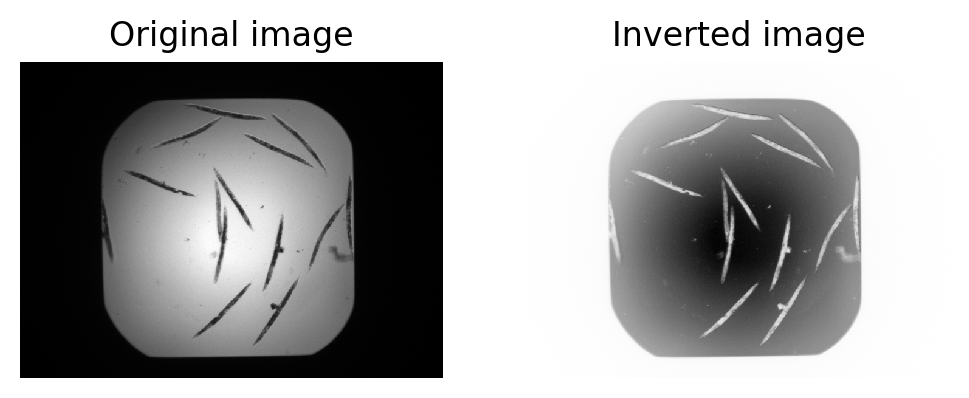

In [15]:
# Bonus challenge: invert a 16-bit image
original_img = imageio.imread('data/BBBC010/dead_raw.tif')
inverted_img = copy.deepcopy(original_img)

# Inversion
(width, height) = inverted_img.shape

#################################### TODO: also add a more pythonic but less readable versiopn in the solution?
# The 16-bit range is [0, 65'535]
for x in range(width):
    for y in range(height):
        inverted_img[x,y] = abs(inverted_img[x,y]-65535)
        
# Visualize result
fig, axes = plt.subplots(nrows=1, ncols=2)

axes[0].imshow(original_img, cmap='gray')
axes[0].axis('off')
axes[0].set_title('Original image')

axes[1].imshow(inverted_img, cmap='gray')
axes[1].axis('off')
axes[1].set_title('Inverted image')

plt.show()

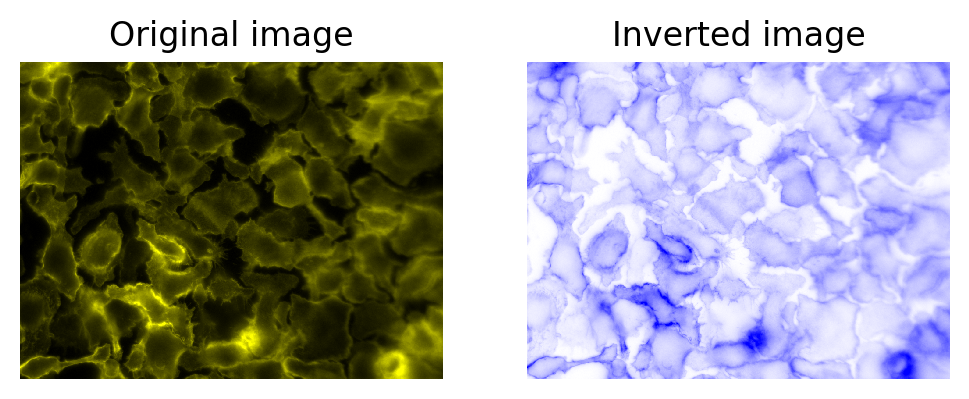

In [16]:
# Bonus challenge: invert an RGB image
original_img = imageio.imread('data/BBBC020/membranes_raw.tif')
inverted_img = copy.deepcopy(original_img)

# Inversion
(width, height, _) = inverted_img.shape

#################################### TODO: also add a more pythonic but less readable versiopn in the solution?
# In RGB, each individual channel is 8-bit
for x in range(width):
    for y in range(height):
        inverted_img[x,y,0] = abs(inverted_img[x,y,0]-255)
        inverted_img[x,y,1] = abs(inverted_img[x,y,1]-255)
        inverted_img[x,y,2] = abs(inverted_img[x,y,2]-255)
        
# Visualize result
fig, axes = plt.subplots(nrows=1, ncols=2)

axes[0].imshow(original_img)
axes[0].axis('off')
axes[0].set_title('Original image')

axes[1].imshow(inverted_img)
axes[1].axis('off')
axes[1].set_title('Inverted image')

plt.show()

**2.3** A general way to modify an image based on its original values is *filtering*. Filtering consists of applying a so-called convolution kernel to an input image (https://en.wikipedia.org/wiki/Kernel_(image_processing). Although the technical details of image filtering are beyond the scope of this tutorial, we can get a sense of what filtering means by considering some examples provided below. Run the code below to see how 1) a Gaussian kernel, 2) the Prewitt filter, and 3) the Frangi filter process the input image. What are their effects? For the Gaussian kernel and Frangi filters, try to modify the value of the parameter called sigma. How does it affect the result? For the Gaussian kernel, do you intuitively understand why?

*The scikit-image library offers many more filters for you to try out and play with if you are interested: https://scikit-image.org/docs/dev/api/skimage.filters.html.*

In [17]:
# We will use the scikit-image library for our filtering examples
import skimage.filters as skf

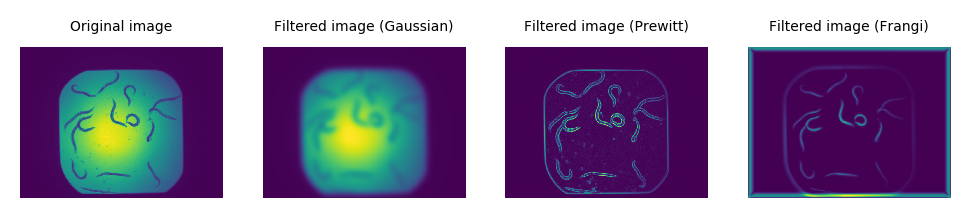

In [18]:
original_img = bbbc010_live

# Apply Gaussian kernel
filtered_img_gaussian = skf.gaussian(original_img, sigma=10)

# Apply Prewitt filter
filtered_img_prewitt = skf.prewitt(original_img)

# Apply Frangi filter
filtered_img_frangi = skf.frangi(original_img, sigmas=range(1, 10, 2))

# Visualize result
fig, axes = plt.subplots(nrows=1, ncols=4)

axes[0].imshow(original_img)
axes[0].axis('off')
axes[0].set_title('Original image', fontsize=5)

axes[1].imshow(filtered_img_gaussian)
axes[1].axis('off')
axes[1].set_title('Filtered image (Gaussian)', fontsize=5)

axes[2].imshow(filtered_img_prewitt)
axes[2].axis('off')
axes[2].set_title('Filtered image (Prewitt)', fontsize=5)

axes[3].imshow(filtered_img_frangi)
axes[3].axis('off')
axes[3].set_title('Filtered image (Frangi)', fontsize=5)

plt.show()

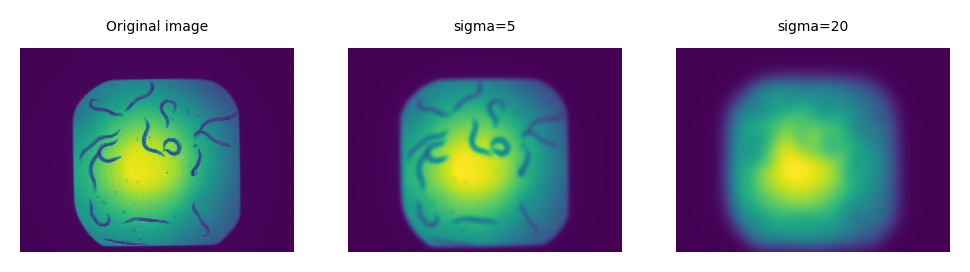

In [19]:
# The value of sigma corresponds to the standard deviation of the Gaussian kernel.
# Larger sigma = larger spread = more blur!
original_img = bbbc010_live

# Small sigma
filtered_img_gaussian_5 = skf.gaussian(original_img, sigma=5)

# Large sigma
filtered_img_gaussian_20 = skf.gaussian(original_img, sigma=20)

# Visualize result
fig, axes = plt.subplots(nrows=1, ncols=3)

axes[0].imshow(original_img)
axes[0].axis('off')
axes[0].set_title('Original image', fontsize=5)

axes[1].imshow(filtered_img_gaussian_5)
axes[1].axis('off')
axes[1].set_title('sigma=5', fontsize=5)

axes[2].imshow(filtered_img_gaussian_20)
axes[2].axis('off')
axes[2].set_title('sigma=20', fontsize=5)

plt.show()

**2.4** Filtering is at the core of many image processing methods. Run the code below to see what happens when taking the difference between one of the BBBC010 images and its Gaussian-blurred version. What do you notice? 

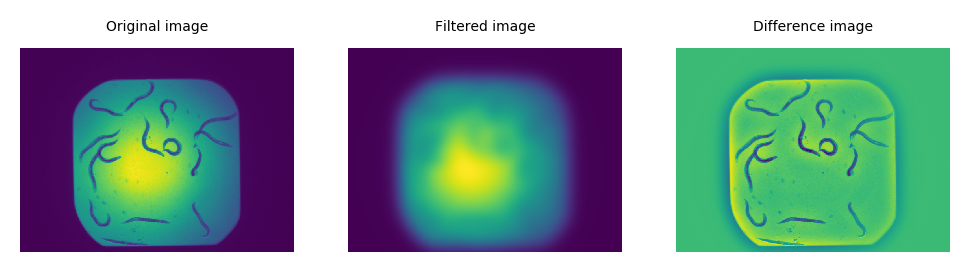

In [20]:
original_img = bbbc010_live

# Apply Gaussian kernel with large-enough sigma to blur the objects
filtered_img = skf.gaussian(original_img, sigma=20)

# Compute the difference between the original and filtered image
# The original image must be normalized because the filtered one is in the [0,1] range.
diff_img = (original_img/255.0) - filtered_img

# Visualize result
fig, axes = plt.subplots(nrows=1, ncols=3)

axes[0].imshow(original_img)
axes[0].axis('off')
axes[0].set_title('Original image', fontsize=5)

axes[1].imshow(filtered_img)
axes[1].axis('off')
axes[1].set_title('Filtered image', fontsize=5)

axes[2].imshow(diff_img)
axes[2].axis('off')
axes[2].set_title('Difference image', fontsize=5) # We just did background subtraction!

plt.show()

## 3. Export

The images we created or modified in this exercise are Python array that only live within this notebook and will disappear whenever it stops running. In order to save them for later, they need to be exported into files.

**3.1** Run the code below to save the image from 2.1 as a tiff file. You can then adapt it to save the other images you generated, or try out different file formats.

In [21]:
imageio.imwrite('data/BBBC010/my_masked_image.tif', masked_img)